In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, tensorflow as tf, cv2, os
from tensorflow import keras

In [ ]:
def apply_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    # Ensure the image is in the correct data type (8-bit unsigned integer)
    if image.dtype != np.uint8:
        image = image.astype(np.uint8)

    # Convert the image to LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Split LAB image into L, A, and B channels
    l_channel, a_channel, b_channel = cv2.split(lab_image)

    # Apply CLAHE to the L channel
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    l_channel_clahe = clahe.apply(l_channel)

    # Merge the CLAHE-enhanced L channel with the original A and B channels
    lab_image_clahe = cv2.merge((l_channel_clahe, a_channel, b_channel))

    # Convert the LAB image back to BGR color space
    enhanced_image = cv2.cvtColor(lab_image_clahe, cv2.COLOR_LAB2BGR)

    return enhanced_image

In [ ]:
IMG, MSK = [], []
k=0
for img, msk in zip(sorted(os.listdir('/content/drive/MyDrive/Crack Analysis Project/crack_segmentation_dataset/train/images'))[:5000],
                              sorted(os.listdir('/content/drive/MyDrive/Crack Analysis Project/crack_segmentation_dataset/train/masks'))[:5000]):
  image = cv2.imread(f'/content/drive/MyDrive/Crack Analysis Project/crack_segmentation_dataset/train/images/{img}')
  image = cv2.resize(image, (128, 128))
  image = apply_clahe(image)
  image = image/image.max()
  mask = cv2.imread(f'/content/drive/MyDrive/Crack Analysis Project/crack_segmentation_dataset/train/masks/{msk}')
  mask = cv2.resize(mask, (128, 128))
  mask = mask/mask.max()
  IMG.append(image)
  MSK.append(mask)
  k+=1
  print(k)
train_image = np.array([ i for i in IMG]).reshape((5000, 128, 128, 3))
train_mask = np.array([ i for i in MSK]).reshape((5000, 128, 128, 3))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


<ipython-input-4-97b599f3763b>:11: RuntimeWarning: invalid value encountered in divide
  mask = mask/mask.max()


4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244


In [ ]:
np.save('/content/drive/MyDrive/Crack Segmentation/train_images.npy', train_image)
np.save('/content/drive/MyDrive/Crack Segmentation/train_masks.npy', train_mask)

In [ ]:
IMG, MSK = [], []
k=0
for img, msk in zip(sorted(os.listdir('/content/drive/MyDrive/Crack Analysis Project/crack_segmentation_dataset/test/images')),
                              sorted(os.listdir('/content/drive/MyDrive/Crack Analysis Project/crack_segmentation_dataset/test/masks'))):
  image = cv2.imread(f'/content/drive/MyDrive/Crack Analysis Project/crack_segmentation_dataset/test/images/{img}')
  image = cv2.resize(image, (128, 128))
  image = apply_clahe(image)
  image = image/image.max()
  mask = cv2.imread(f'/content/drive/MyDrive/Crack Analysis Project/crack_segmentation_dataset/test/masks/{msk}')
  mask = cv2.resize(mask, (128, 128))
  mask = mask/mask.max()
  IMG.append(image)
  MSK.append(mask)
  k+=1
  print(k)
test_image = np.array([ i for i in IMG]).reshape((1695, 128, 128, 3))
test_mask = np.array([ i for i in MSK]).reshape((1695, 128, 128, 3))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


<ipython-input-6-594acea0fc4e>:11: RuntimeWarning: invalid value encountered in divide
  mask = mask/mask.max()


741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990


In [ ]:
np.save('/content/drive/MyDrive/Crack Segmentation/test_images.npy', test_image)
np.save('/content/drive/MyDrive/Crack Segmentation/test_masks.npy', test_mask)

## Data Loading

In [3]:
train_image = np.load('/content/drive/MyDrive/Crack Segmentation/train_images.npy')
# test_image = np.load('/content/drive/MyDrive/Crack Segmentation/test_images.npy')
train_mask = np.load('/content/drive/MyDrive/Crack Segmentation/train_masks.npy')
# test_mask = np.load('/content/drive/MyDrive/Crack Segmentation/test_masks.npy')
# train_image.shape, test_image.shape, train_mask.shape, test_mask.shape

In [ ]:
test_image = np.load('/content/drive/MyDrive/Crack Segmentation/test_images.npy')
test_mask = np.load('/content/drive/MyDrive/Crack Segmentation/test_masks.npy')

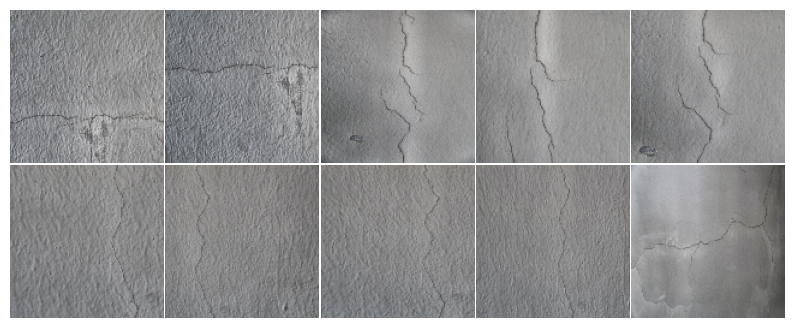

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']=(10, 4)
sns.set_style("whitegrid", {'axes.grid' : False})

for i, image in enumerate(test_image[990:1000]):
    plt.subplot(2, 5, i + 1)
    plt.axis("off")
    plt.imshow(image, aspect='auto')

plt.subplots_adjust(hspace=0.01, wspace=0.01)
plt.savefig('Roads_Cracks_2.png', dpi=600, bbox_inches='tight')
plt.show()


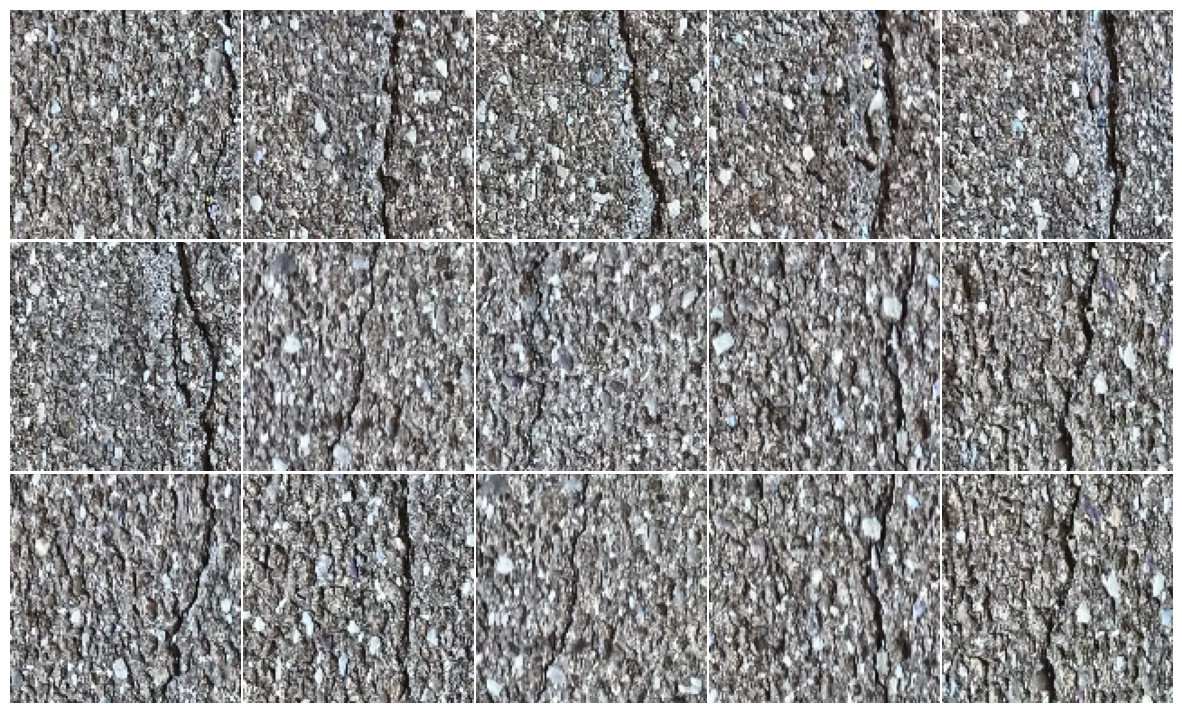

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 9)
sns.set_style("whitegrid", {'axes.grid': False})

# Assuming test_image contains your images
for i, image in enumerate(train_image[980:995]):
    plt.subplot(3, 5, i + 1)
    plt.axis("off")
    plt.imshow(image, aspect='auto')

plt.subplots_adjust(hspace=0.01, wspace=0.01)
plt.savefig('Roads_Cracks_3x5_1.png', dpi=600, bbox_inches='tight')
plt.show()


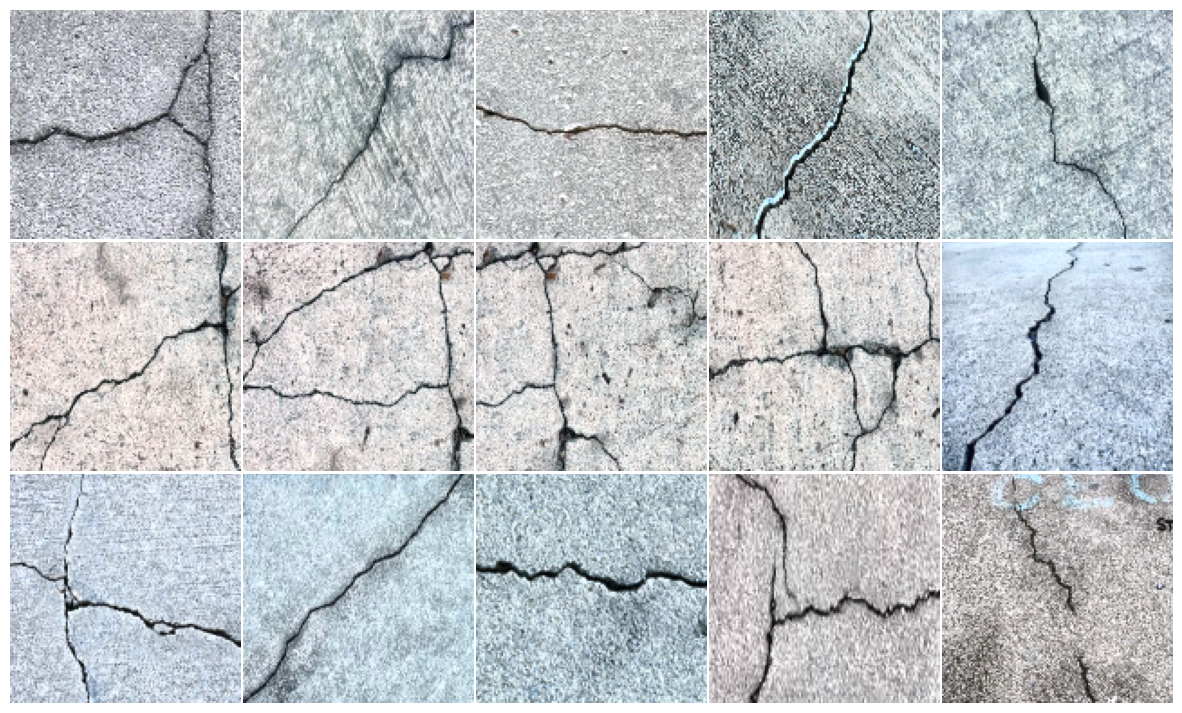

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 9)
sns.set_style("whitegrid", {'axes.grid': False})

# Assuming test_image contains your images
for i, image in enumerate(train_image[2985:3000]):
    plt.subplot(3, 5, i + 1)
    plt.axis("off")
    plt.imshow(image, aspect='auto')

plt.subplots_adjust(hspace=0.01, wspace=0.01)
plt.savefig('Roads_Cracks_3x5_2.png', dpi=600, bbox_inches='tight')
plt.show()

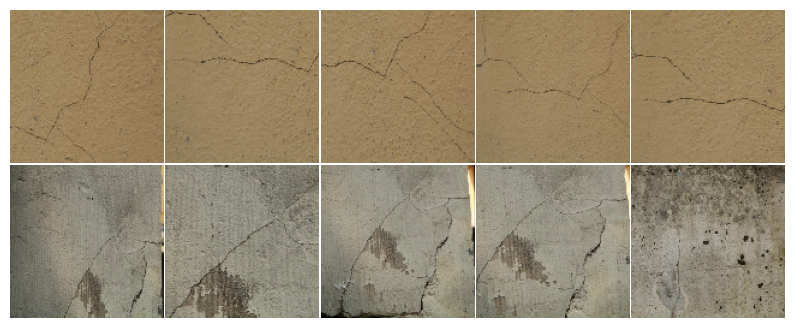

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']=(10, 4)
sns.set_style("whitegrid", {'axes.grid' : False})

for i, image in enumerate(test_image[701:711]):
    plt.subplot(2, 5, i + 1)
    plt.axis("off")
    plt.imshow(image, aspect='auto')

plt.subplots_adjust(hspace=0.01, wspace=0.01)
plt.savefig('Roads_Cracks_3.png', dpi=600, bbox_inches='tight')
plt.show()

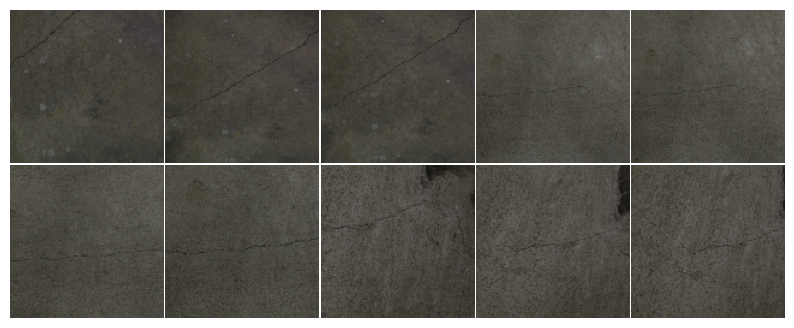

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']=(10, 4)
sns.set_style("whitegrid", {'axes.grid' : False})

for i, image in enumerate(test_image[1200:1210]):
    plt.subplot(2, 5, i + 1)
    plt.axis("off")
    plt.imshow(image, aspect='auto')

plt.subplots_adjust(hspace=0.01, wspace=0.01)
plt.savefig('Roads_Cracks_4.pdf', dpi=600, bbox_inches='tight')
plt.show()

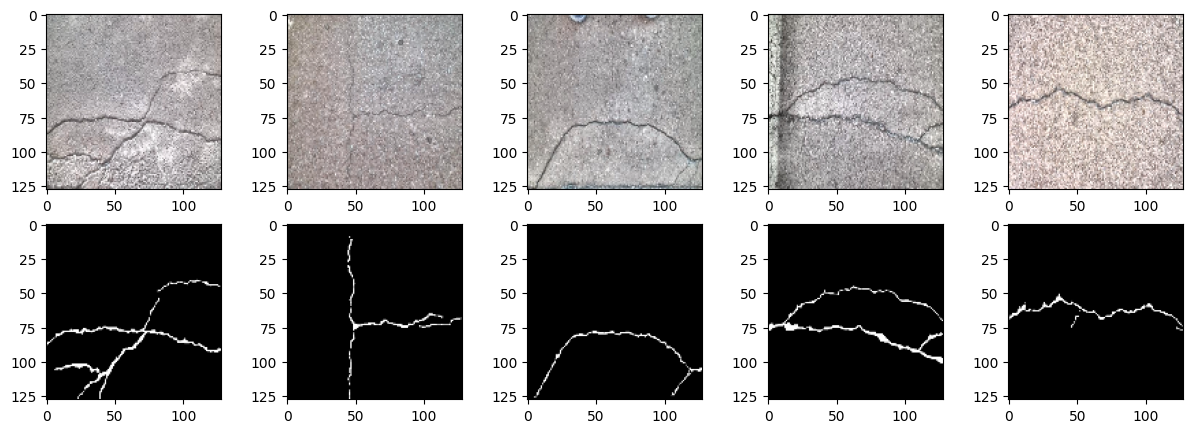

In [ ]:
plt.rcParams['figure.figsize']=(15,5)
plt.subplot(2,5,1)
plt.imshow(train_image[0])
plt.subplot(2,5,2)
plt.imshow(train_image[1])
plt.subplot(2,5,3)
plt.imshow(train_image[2])
plt.subplot(2,5,4)
plt.imshow(test_image[3])
plt.subplot(2,5,5)
plt.imshow(test_image[15])

plt.subplot(2,5,6)
plt.imshow(train_mask[0])
plt.subplot(2,5,7)
plt.imshow(train_mask[1])
plt.subplot(2,5,8)
plt.imshow(train_mask[2])
plt.subplot(2,5,9)
plt.imshow(test_mask[3])
plt.subplot(2,5,10)
plt.imshow(test_mask[15])
plt.show()

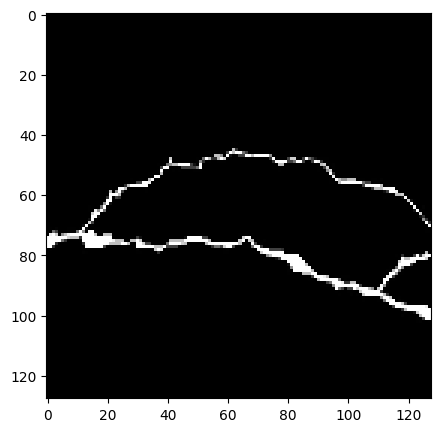

In [ ]:
plt.imshow(test_mask[3])

## CRAKNET Algorithm Designing

In [ ]:
!pip install keras_cv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.1/803.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.9/944.9 kB 12.5 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import keras_cv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, backend

IMAGE_SIZE = 128
BATCH_SIZE = 4
OUT_CLASSES = 1

Using TensorFlow backend


In [ ]:
def basic_block(x_input, filters, stride=1, down_sample=None, activation=None):
    """Creates a residual(identity) block with two 3*3 convolutions."""
    residual = x_input
    x = layers.Conv2D(filters/8, (3, 3), strides=stride, padding="same", use_bias=False)(x_input)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.Conv2D(filters, (3, 3), strides=(1, 1), padding="same", use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    if down_sample is not None:
        residual = down_sample

    x = layers.Add()([x, residual])

    if activation is not None:
        x = layers.Activation(activation)(x)

    return x


def convolution_block(x_input, filters, dilation=1):
    x = layers.Conv2D(filters, (3, 3), padding="same", dilation_rate=dilation)(x_input)
    x = layers.BatchNormalization()(x)
    return layers.Activation("relu")(x)


def segmentation_head(x_input, out_classes, final_size):
    """Map each decoder stage output to model output classes."""
    x = layers.Conv2D(out_classes, kernel_size=(3, 3), padding="same", activation='sigmoid')(x_input)
    if final_size is not None:
        x = layers.Resizing(final_size[0], final_size[1])(x)
    return x


def get_resnet_block(_resnet, block_num):
    """Extract and return ResNet-34 block."""
    resnet_layers = [3, 4, 6, 3]  # ResNet-34 layer sizes at different block.
    return keras.models.Model(
        inputs=_resnet.get_layer(f"v2_stack_{block_num}_block1_1_conv").input,
        outputs=_resnet.get_layer(
            f"v2_stack_{block_num}_block{resnet_layers[block_num]}_add"
        ).output,
        name=f"resnet34_block{block_num + 1}",
    )

In [ ]:
def basnet_predict(input_shape, out_classes):
    """BASNet Prediction Module, it outputs coarse label map."""
    filters = 64
    num_stages = 6
    x_input = layers.Input(input_shape)

    # -------------Encoder--------------
    x = layers.Conv2D(filters, kernel_size=(3, 3), padding="same")(x_input)
    resnet = keras_cv.models.ResNet34Backbone(include_rescaling=False)

    encoder_blocks = []
    for i in range(num_stages):
        if i < 4:  # First four stages are adopted from ResNet-34 blocks.
            x = get_resnet_block(resnet, i)(x)
            encoder_blocks.append(x)
            x = layers.Activation("relu")(x)
        else:  # Last 2 stages consist of three basic resnet blocks.
            x = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x)
            x = basic_block(x, filters=filters * 8, activation="relu")
            encoder_blocks.append(x)

    # -------------Bridge-------------
    x = convolution_block(x, filters=filters/4 , dilation=2)
    x = convolution_block(x, filters=filters/4 , dilation=2)
    encoder_blocks.append(x)

    # -------------Decoder-------------
    decoder_blocks = []
    for i in reversed(range(num_stages)):
        if i != (num_stages - 1):  # Except first, scale other decoder stages.
            shape = keras.backend.int_shape(x)
            x = layers.Resizing(shape[1] * 2, shape[2] * 2)(x)
        x = layers.concatenate([encoder_blocks[i], x], axis=-1)
        x = convolution_block(x, filters=filters/4)
        decoder_blocks.append(x)

    decoder_blocks.reverse()  # Change order from last to first decoder stage.
    decoder_blocks.append(encoder_blocks[-1])  # Copy bridge to decoder.

    # -------------Side Outputs--------------
    decoder_blocks = [
        segmentation_head(decoder_block, out_classes, input_shape[:2])
        for decoder_block in decoder_blocks
    ]
    decoder_blocks.append(x_input)
    return keras.models.Model(inputs=[x_input], outputs=decoder_blocks)

In [ ]:
def basnet_rrm(out_classes):
    """BASNet Residual Refinement Module(RRM) module, output fine label map."""
    num_stages = 4
    filters = 64
    # -------------Encoder--------------
    x = layers.Input(shape=(128,128,64))
    X = x
    y = layers.Input(shape=(128,128,3))

    encoder_blocks = []
    for _ in range(num_stages):
        x = convolution_block(x, filters=filters)
        encoder_blocks.append(x)
        x = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x)

    # -------------Bridge--------------
    f = convolution_block(x, filters=filters)

    # -------------Decoder--------------
    for i in reversed(range(num_stages)):
        shape = keras.backend.int_shape(f)
        f = layers.Resizing(shape[1] * 2, shape[2] * 2)(f)
        f = layers.concatenate([encoder_blocks[i], f], axis=-1)
        f = convolution_block(f, filters=filters)

    f = segmentation_head(f, out_classes, None)  # Segmentation head.

    # ------------- refined = coarse + residual
    f = layers.Add()([y, f])  # Add prediction + refinement output
#
    return keras.models.Model(inputs=[X,y], outputs=[f])

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Add
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.layers import Reshape


def hierarchical_mask_fusion(num_masks, mask_shape=(128, 128, 3)):
    # Create placeholders for the masks and store them in a list
    mask_inputs = [Input(shape=mask_shape) for _ in range(num_masks)]

    # Initialize the fused mask as the first input mask
    fused_mask = Lambda(lambda x: tf.keras.backend.batch_flatten(x))(mask_inputs[0])
    # Flatten the masks for compatibility with Cosine Similarity
    flatten_masks = [Lambda(lambda x: tf.keras.backend.batch_flatten(x))(mask) for mask in mask_inputs]

    # Calculate Cosine Similarity scores and weights hierarchically
    for i in range(1, num_masks):
        # Calculate dot product between flattened masks
        dot_product = Lambda(lambda x: tf.reduce_sum(x[0] * x[1], axis=-1, keepdims=True))([flatten_masks[i], fused_mask])
        print(dot_product)
        # Calculate L2 norm of the masks
        norm_mask_i = Lambda(lambda x: tf.norm(x, axis=-1, keepdims=True))(flatten_masks[i])
        norm_fused_mask = Lambda(lambda x: tf.norm(x, axis=-1, keepdims=True))(fused_mask)
        print(norm_fused_mask)
        # Calculate Cosine Similarity
        cosine_similarity = Lambda(lambda x: x[0] / (x[1] * x[2] + 1e-8))([dot_product, norm_mask_i, norm_fused_mask])
        print(cosine_similarity)
        attention_weights = cosine_similarity  # Use Cosine Similarity scores directly as attention weights
        weighted_mask = Lambda(lambda x: x[0] * x[1] )([attention_weights, flatten_masks[i]])
        # Reshape the weighted mask to match the shape of fused_mask
        print(fused_mask, weighted_mask)
        fused_mask = Add()([fused_mask, weighted_mask])
    # Create a Keras model
    model = Model(inputs=[mask_inputs], outputs=[fused_mask])
    return model

# Example usage:
num_masks = 7
Fusion_model = hierarchical_mask_fusion(num_masks)
Fusion_model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='lambda_8/Sum:0', description="created by layer 'lambda_8'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='lambda_10/norm/Sqrt:0', description="created by layer 'lambda_10'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='lambda_11/truediv:0', description="created by layer 'lambda_11'")
KerasTensor(type_spec=TensorSpec(shape=(None, None), dtype=tf.float32, name=None), name='lambda/Reshape:0', description="created by layer 'lambda'") KerasTensor(type_spec=TensorSpec(shape=(None, None), dtype=tf.float32, name=None), name='lambda_12/mul:0', description="created by layer 'lambda_12'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='lambda_13/Sum:0', description="created by layer 'lambda_13'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='lambda_15/norm

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Concatenate, Add, Average

def minimal_residual_inception_block(input_tensor, filters):
    # Convolution 1x1 for dimension reduction
    x = Conv2D(filters, (1, 1), activation='relu', input_shape=(128,128,3))(input_tensor)
    # Inception-like block with 3x3 and 5x5 convolutions
    branch3x3 = Conv2D(filters, (3, 3), activation='relu', padding='same')(x)
    branch5x5 = Conv2D(filters, (5, 5), activation='relu', padding='same')(x)
    # Concatenate all branches
    concat = Average()([branch3x3, branch5x5])
    return concat

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Concatenate
from tensorflow.keras.models import Model
from keras import layers
import numpy as np
import pywt, scipy

def fourier_transform(x):
      imag_input = tf.zeros_like(x)
      complex_input = Concatenate(axis=-1)([x, imag_input])
      real_part = complex_input[:, :, :, 0]
      imag_part = complex_input[:, :, :, 1]
    # Combine real and imaginary parts to form a complex array
      complex_array = tf.complex(real_part, imag_part)

      x_complex = tf.signal.fft2d(complex_array)
      x_real = tf.math.real(x_complex)
      x_imag = tf.math.imag(x_complex)
      return tf.stack([x_real, x_imag], axis=-1)

def create_concatenated_feature_model(input_shape=(128, 128, 3)):
    # Define input layers for image and mask
    image_input = Input(shape=input_shape, name='image_input')
    mask_input = Input(shape=input_shape, name='mask_input')

    # Generate segmented image by element-wise multiplication
    segmented_image = tf.keras.layers.Multiply()([image_input, mask_input])

    # Generate Fourier-transformed feature image

    feature_image = Lambda(fourier_transform)(mask_input)

    # Define convolutional layers (four 16x16 filters)
    num_filters = 16

    # Apply convolutional layers to each input
    image_features = minimal_residual_inception_block(image_input,16)
    segmented_features = minimal_residual_inception_block(segmented_image, 16)
    mask_features = minimal_residual_inception_block(mask_input, 16)
    fourier_features = minimal_residual_inception_block(feature_image, 16)

    # Concatenate the resulting feature maps
    concatenated_features = Concatenate(axis=-1)([image_features ,mask_features, segmented_features , fourier_features])

    # Create a model with inputs and concatenated features as output
    model = Model(inputs=[image_input, mask_input], outputs=concatenated_features)
    return model
# Example usage:
features_fusion_model = create_concatenated_feature_model()
features_fusion_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image_input (InputLayer)    [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 mask_input (InputLayer)     [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 multiply (Multiply)         (None, 128, 128, 3)          0         ['image_input[0][0]',         
                                                                     'mask_input[0][0]']          
                                                                                                  
 lambda_38 (Lambda)          (None, 128, 128, 2)          0         ['mask_input[0][0]']    

In [ ]:
def basnet(input_shape, out_classes):
    # Prediction model.
    OUT = basnet_predict(input_shape, out_classes)
    print(OUT)
    inputs__, predict_model = OUT.output[-1], OUT.output[:-1]
    # Hierarchical fusion
    Fusion_model = hierarchical_mask_fusion(len(predict_model))
    Fused_mask = Fusion_model(predict_model)
    Fused_mask = Reshape(target_shape=(128,128,3))(Fused_mask)
    features_fusion_model = create_concatenated_feature_model()
    M = features_fusion_model([inputs__, Fused_mask])
    # Refinement model.
    BASENET_RRM = basnet_rrm(out_classes)
    Outcome = BASENET_RRM([M, inputs__])
    return keras.models.Model(inputs=[OUT.input], outputs=[Outcome])

My_One = basnet((128,128,3), 3)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='lambda_47/Sum:0', description="created by layer 'lambda_47'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='lambda_49/norm/Sqrt:0', description="created by layer 'lambda_49'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='lambda_50/truediv:0', description="created by layer 'lambda_50'")
KerasTensor(type_spec=TensorSpec(shape=(None, None), dtype=tf.float32, name=None), name='lambda_39/Reshape:0', description="created by layer 'lambda_39'") KerasTensor(type_spec=TensorSpec(shape=(None, None), dtype=tf.float32, name=None), name='lambda_51/mul:0', description="created by layer 'lambda_51'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='lambda_52/Sum:0', description="created by layer 'lambda_52'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='lambda

In [ ]:
OUT = basnet_predict((128,128,3), 3)
OUT.summary()

Model: "model_34"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_169 (InputLayer)      [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_449 (Conv2D)         (None, 128, 128, 64)         1792      ['input_169[0][0]']           
                                                                                                  
 resnet34_block1 (Functiona  (None, None, None, 64)       222720    ['conv2d_449[0][0]']          
 l)                                                                                               
                                                                                                  
 activation_319 (Activation  (None, 128, 128, 64)         0         ['resnet34_block1[0][0]

In [ ]:
BASENET_RRM = basnet_rrm(3)
BASENET_RRM.summary()

Model: "model_35"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_175 (InputLayer)      [(None, 128, 128, 64)]       0         []                            
                                                                                                  
 conv2d_469 (Conv2D)         (None, 128, 128, 64)         36928     ['input_175[0][0]']           
                                                                                                  
 batch_normalization_272 (B  (None, 128, 128, 64)         256       ['conv2d_469[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_335 (Activation  (None, 128, 128, 64)         0         ['batch_normalization_2

In [ ]:
My_One.summary()

Model: "model_33"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_154 (InputLayer)      [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_407 (Conv2D)         (None, 128, 128, 64)         1792      ['input_154[0][0]']           
                                                                                                  
 resnet34_block1 (Functiona  (None, None, None, 64)       222720    ['conv2d_407[0][0]']          
 l)                                                                                               
                                                                                                  
 activation_294 (Activation  (None, 128, 128, 64)         0         ['resnet34_block1[0][0]

In [ ]:
len(My_One.layers)

79

In [ ]:
from keras.utils import plot_model

In [ ]:
plot_model(My_One, to_file='My_One.png')

In [ ]:
from keras import backend as K
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model

smooth = 1.
def dice_loss(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return 1-((2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth))

LOG = keras.callbacks.CSVLogger('/content/drive/MyDrive/Crack Analysis Project/Crack_Segment_Information.csv', separator=",", append=False)

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
class BasnetLoss(keras.losses.Loss):
    """BASNet hybrid loss."""

    def __init__(self, **kwargs):
        super().__init__(name="basnet_loss", **kwargs)
        self.smooth = 1.0e-9

        # Binary Cross Entropy loss.
        self.cross_entropy_loss = keras.losses.BinaryCrossentropy()
        # Structural Similarity Index value.
        self.ssim_value = tf.image.ssim
        #  Jaccard / IoU loss.
        self.iou_value = self.calculate_iou

    def calculate_iou(
        self,
        y_true,
        y_pred,
    ):
        """Calculate intersection over union (IoU) between images."""
        intersection = backend.sum(backend.abs(y_true * y_pred), axis=[1, 2, 3])
        union = backend.sum(y_true, [1, 2, 3]) + backend.sum(y_pred, [1, 2, 3])
        union = union - intersection
        return backend.mean(
            (intersection + self.smooth) / (union + self.smooth), axis=0
        )

    def call(self, y_true, y_pred):
        cross_entropy_loss = self.cross_entropy_loss(y_true, y_pred)

        ssim_value = self.ssim_value(y_true, y_pred, max_val=1)
        ssim_loss = backend.mean(1 - ssim_value + self.smooth, axis=0)

        iou_value = self.iou_value(y_true, y_pred)
        iou_loss = 1 - iou_value

        # Add all three losses.
        return cross_entropy_loss + ssim_loss + iou_loss

In [ ]:
My_One.compile(optimizer='Adam', loss=dice_loss, metrics=["accuracy", keras.metrics.Recall(), keras.metrics.Precision()])

In [ ]:
hist = My_One.fit(train_image, train_mask, epochs=50, validation_split=0.20, batch_size = 16, callbacks = [LOG], shuffle=True)

In [ ]:
My_One.save('/content/drive/MyDrive/Crack Analysis Project/Crack_Seg_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.layers import concatenate
from keras.models import load_model
My_One.load_weights('/content/drive/MyDrive/Crack Analysis Project/Crack_Seg_Model.h5', by_name=True)

In [ ]:
My_One.compile(optimizer='Adam', loss=dice_loss, metrics=["accuracy", keras.metrics.Recall(), keras.metrics.Precision()])
My_One.evaluate(test_image, test_mask)

In [ ]:
preds = My_One.predict(test_image)

53/53 [==============================] - 15s 283ms/step


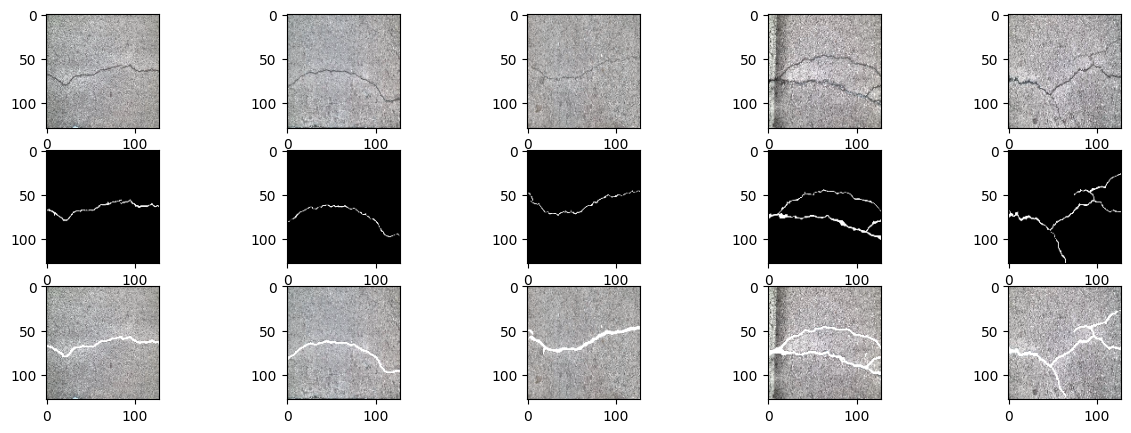

In [ ]:
plt.rcParams['figure.figsize']=(15,5)
plt.subplot(3,5,1)
plt.imshow(test_image[0])
plt.subplot(3,5,2)
plt.imshow(test_image[1])
plt.subplot(3,5,3)
plt.imshow(test_image[2])
plt.subplot(3,5,4)
plt.imshow(test_image[3])
plt.subplot(3,5,5)
plt.imshow(test_image[5])

plt.subplot(3,5,6)
plt.imshow(test_mask[0])
plt.subplot(3,5,7)
plt.imshow(test_mask[1])
plt.subplot(3,5,8)
plt.imshow(test_mask[2])
plt.subplot(3,5,9)
plt.imshow(test_mask[3])
plt.subplot(3,5,10)
plt.imshow(test_mask[5])

plt.subplot(3,5,11)
plt.imshow((preds[0]))
plt.subplot(3,5,12)
plt.imshow((preds[1]))
plt.subplot(3,5,13)
plt.imshow((preds[2]))
plt.subplot(3,5,14)
plt.imshow((preds[3]))
plt.subplot(3,5,15)
plt.imshow((preds[5]))
plt.show()

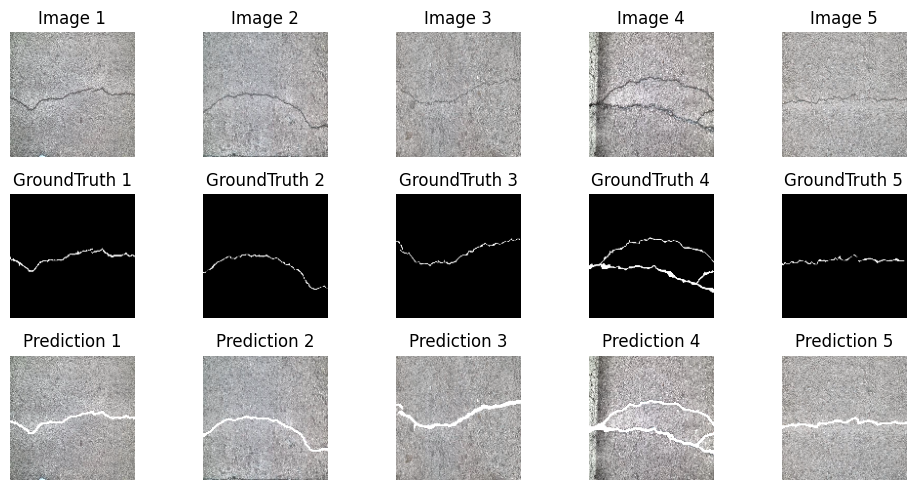

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size and create subplots
fig, axes = plt.subplots(3, 5, figsize=(10, 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define the data sources

# Iterate through the sources and plot them
for i, (image, mask, pred) in enumerate(zip(test_image[:5], test_mask[:5], preds[:5])):
    # Plot the images
    axes[i].imshow(image)
    axes[i].set_title(f"Image {i+1}")

    # Plot the masks
    axes[i+5].imshow(mask)
    axes[i+5].set_title(f"GroundTruth {i+1}")

    # Plot the predictions
    axes[i+10].imshow(pred)
    axes[i+10].set_title(f"Prediction {i+1}")

# Remove ticks and labels
for ax in axes:
    ax.axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure as a high-quality PNG
plt.savefig('figure.png', dpi=300, bbox_inches='tight')

# Display the figure
plt.show()


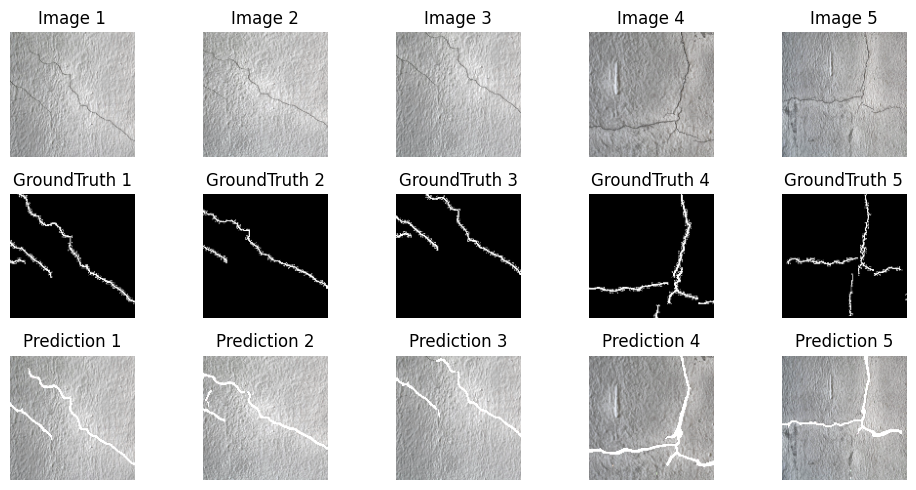

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size and create subplots
fig, axes = plt.subplots(3, 5, figsize=(10, 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define the data sources

# Iterate through the sources and plot them
for i, (image, mask, pred) in enumerate(zip(test_image[980:985], test_mask[980:985], preds[980:985])):
    # Plot the images
    axes[i].imshow(image)
    axes[i].set_title(f"Image {i+1}")

    # Plot the masks
    axes[i+5].imshow(mask)
    axes[i+5].set_title(f"GroundTruth {i+1}")

    # Plot the predictions
    axes[i+10].imshow(pred)
    axes[i+10].set_title(f"Prediction {i+1}")

# Remove ticks and labels
for ax in axes:
    ax.axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure as a high-quality PNG
plt.savefig('figure2.png', dpi=300, bbox_inches='tight')

# Display the figure
plt.show()


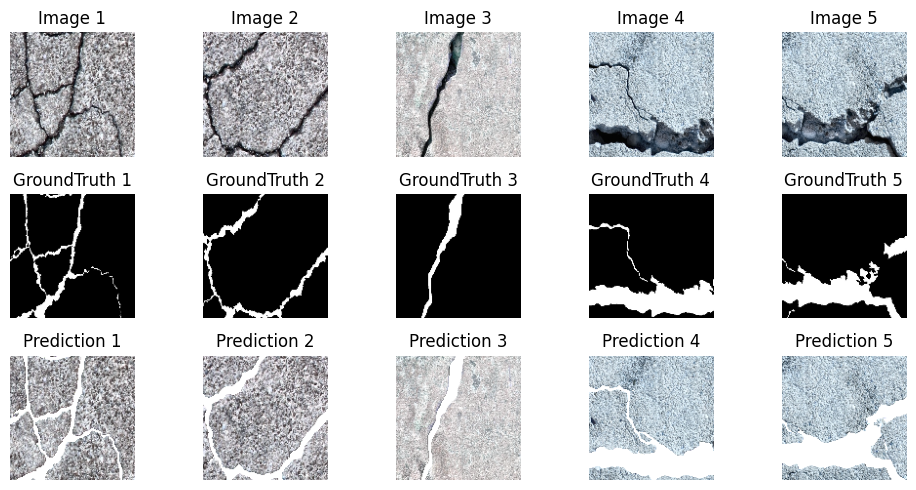

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size and create subplots
fig, axes = plt.subplots(3, 5, figsize=(10, 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define the data sources

# Iterate through the sources and plot them
for i, (image, mask, pred) in enumerate(zip(test_image[550:555], test_mask[550:555], preds[550:555])):
    # Plot the images
    axes[i].imshow(image)
    axes[i].set_title(f"Image {i+1}")

    # Plot the masks
    axes[i+5].imshow(mask)
    axes[i+5].set_title(f"GroundTruth {i+1}")

    # Plot the predictions
    axes[i+10].imshow(pred)
    axes[i+10].set_title(f"Prediction {i+1}")

# Remove ticks and labels
for ax in axes:
    ax.axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure as a high-quality PNG
plt.savefig('figure3.png', dpi=300, bbox_inches='tight')

# Display the figure
plt.show()
